In [2]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import calendar
from matplotlib import pyplot as plt
import scipy.stats as stats

In [3]:
# https://www.tepco.co.jp/forecast/html/images/fit-2020.csv
# http://www.jepx.org/market/excel/spot_2019.csv
# http://www.jepx.org/market/excel/im_trade_summary_2019.csv

In [60]:
year = 2019

# df_spot= pd.read_csv(f'/Users/yusuke_miyazaki/Desktop/OneDrive/研究関連データ/JEPX_tradedata/spot_{year}.csv',encoding='Shift-JIS')
# df_jikanmae = pd.read_csv(f'/Users/yusuke_miyazaki/Desktop/OneDrive/研究関連データ/JEPX_tradedata/im_trade_summary_{year}.csv',encoding='Shift-JIS')

df_spot=pd.read_csv(f'http://www.jepx.org/market/excel/spot_{year}.csv',encoding='Shift-JIS')
df_jikanmae= pd.read_csv(f'http://www.jepx.org/market/excel/im_trade_summary_{year}.csv',encoding='Shift-JIS')
df_toden_error = pd.read_csv(f'https://www.tepco.co.jp/forecast/html/images/fit-{year}.csv',encoding='Shift-JIS')



In [61]:
# 不足分 プラスが足りない分、マイナスは余ってる
df_toden_error['solar_error(kWh)'] = df_toden_error['太陽光想定(kWh)'] - df_toden_error['太陽光実績(kWh)']
df_toden_error['wind_error(kWh)'] = df_toden_error['風力想定(kWh)'] - df_toden_error['風力実績(kWh)']
df_toden_error['error_sum(MWh)'] = (df_toden_error['solar_error(kWh)'] + df_toden_error['wind_error(kWh)'])/1000


# /////足りない分だけを合算
# 太陽光の足りない分だけ(プラスが足りない分)
df_toden_error['solar_lack(kWh)'] = df_toden_error['solar_error(kWh)']
df_toden_error.loc[df_toden_error['solar_lack(kWh)']<0, ['solar_lack(kWh)']] = 0
# 風力の足りない分だけ(プラスが足りない分)
df_toden_error['wind_lack(kWh)'] = df_toden_error['wind_error(kWh)']
df_toden_error.loc[df_toden_error['wind_lack(kWh)']<0, ['wind_lack(kWh)']] = 0
# 足りない分を合算
df_toden_error['lack_sum(MWh/h)'] = (df_toden_error['solar_lack(kWh)'] + df_toden_error['wind_lack(kWh)'])*0.5/1000


# 発電誤差率
df_toden_error['solar_error(%)'] = df_toden_error['太陽光想定(kWh)'] - df_toden_error['太陽光実績(kWh)']
df_toden_error['wind_error(%)'] = abs(df_toden_error['wind_error(kWh)']/df_toden_error['風力実績(kWh)']*100)






In [62]:
df_toden_error

,DATE,TIME,太陽光想定(kWh),太陽光実績(kWh),風力想定(kWh),風力実績(kWh),solar_error(kWh),wind_error(kWh),error_sum(MWh),solar_lack(kWh),wind_lack(kWh),lack_sum(MWh/h),solar_error(%),wind_error(%)
0,2019/4/1,0:00,0,0,79712,64361,0,15351,15.351,0,15351,7.6755,0,23.851401
1,2019/4/1,0:30,0,0,78279,64029,0,14250,14.250,0,14250,7.1250,0,22.255540
2,2019/4/1,1:00,0,0,76528,61813,0,14715,14.715,0,14715,7.3575,0,23.805672
3,2019/4/1,1:30,0,0,74331,59494,0,14837,14.837,0,14837,7.4185,0,24.938649
4,2019/4/1,2:00,0,0,71711,55653,0,16058,16.058,0,16058,8.0290,0,28.853790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17563,2020/3/31,21:30,0,0,29398,50020,0,-20622,-20.622,0,0,0.0000,0,41.227509
17564,2020/3/31,22:00,0,0,28845,52814,0,-23969,-23.969,0,0,0.0000,0,45.383800
17565,2020/3/31,22:30,0,0,28179,54786,0,-26607,-26.607,0,0,0.0000,0,48.565327
17566,2020/3/31,23:00,0,0,27504,54800,0,-27296,-27.296,0,0,0.0000,0,49.810219


<AxesSubplot: ylabel='Frequency'>

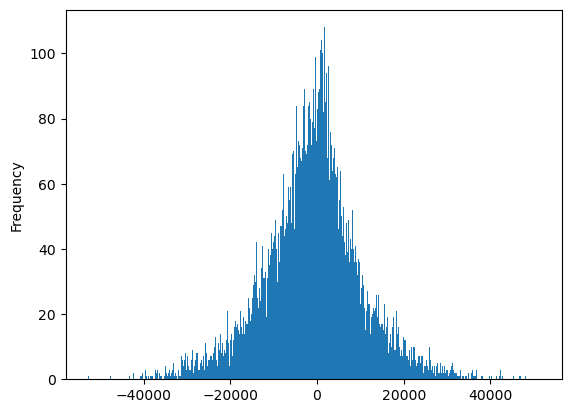

In [76]:
df_toden_error['wind_error(kWh)'].plot.hist(bins=1000)

In [63]:
volume_jikannmae =  df_jikanmae['約定量合計（MWh/h）'].values
lack_sum_toden = df_toden_error['lack_sum(MWh/h)'].values

# df_jikanmae['']

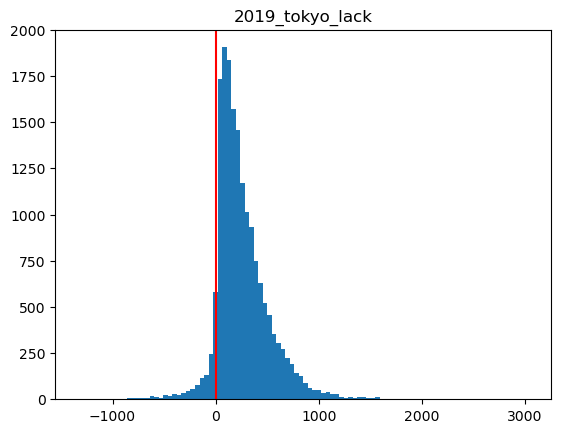

東京電力が抱えているFIT分の再エネが全て市場に参加すると起こる時間前市場の取引量の不足分(全ての取引を再エネ事業者が不足分を補うために行った場合)

不足発生コマ数1053
一年のうち5.99%


In [65]:
plt.hist(volume_jikannmae-lack_sum_toden,bins=100)
plt.title(f'{year}_tokyo_lack')
plt.axvline(x=0,color = 'r')
plt.show()
print('東京電力が抱えているFIT分の再エネが全て市場に参加すると起こる時間前市場の取引量の不足分(全ての取引を再エネ事業者が不足分を補うために行った場合)')

print('')
df_jikanmae['東電必要量'] = volume_jikannmae-lack_sum_toden
s = df_jikanmae['東電必要量']
s_bool = (s<0)
print(f'不足発生コマ数{s_bool.sum()}')
print(f'一年のうち{round(s_bool.sum()/len(df_jikanmae)*100,2)}%')

In [66]:
df_jikanmae['東電必要量'] = volume_jikannmae-lack_sum_toden

In [67]:
s = df_jikanmae['東電必要量']
s_bool = (s<0)
s_bool.sum()

1053

In [68]:
863/17520*100

4.925799086757991

In [69]:
s_bool

0        False
1        False
2        False
3        False
4        False
         ...  
17563    False
17564    False
17565    False
17566    False
17567    False
Name: 東電必要量, Length: 17568, dtype: bool

In [70]:
df_jikanmae

,年月日,時刻コード,始値（円/kWh）,高値（円/kWh）,安値（円/kWh）,終値（円/kWh）,平均（円/kWh）,約定量合計（MWh/h）,約定件数,東電必要量
0,2019/04/01,1,6.66,6.66,6.18,6.56,6.20,50.2,11,42.5245
1,2019/04/01,2,6.66,6.76,5.58,5.73,6.19,88.8,22,81.6750
2,2019/04/01,3,6.59,6.69,5.43,5.60,6.19,139.4,25,132.0425
3,2019/04/01,4,6.59,6.69,5.43,5.65,6.19,71.4,20,63.9815
4,2019/04/01,5,6.57,6.99,5.81,5.95,6.19,68.9,21,60.8710
...,...,...,...,...,...,...,...,...,...,...
17563,2020/03/31,44,8.06,35.05,3.00,8.91,12.09,239.2,88,239.2000
17564,2020/03/31,45,8.66,15.10,3.55,4.82,8.11,134.0,86,134.0000
17565,2020/03/31,46,8.42,15.10,3.35,4.86,7.93,133.8,77,133.8000
17566,2020/03/31,47,5.50,16.10,3.63,6.00,8.39,104.4,67,104.4000


In [71]:
df_jikanmae

,年月日,時刻コード,始値（円/kWh）,高値（円/kWh）,安値（円/kWh）,終値（円/kWh）,平均（円/kWh）,約定量合計（MWh/h）,約定件数,東電必要量
0,2019/04/01,1,6.66,6.66,6.18,6.56,6.20,50.2,11,42.5245
1,2019/04/01,2,6.66,6.76,5.58,5.73,6.19,88.8,22,81.6750
2,2019/04/01,3,6.59,6.69,5.43,5.60,6.19,139.4,25,132.0425
3,2019/04/01,4,6.59,6.69,5.43,5.65,6.19,71.4,20,63.9815
4,2019/04/01,5,6.57,6.99,5.81,5.95,6.19,68.9,21,60.8710
...,...,...,...,...,...,...,...,...,...,...
17563,2020/03/31,44,8.06,35.05,3.00,8.91,12.09,239.2,88,239.2000
17564,2020/03/31,45,8.66,15.10,3.55,4.82,8.11,134.0,86,134.0000
17565,2020/03/31,46,8.42,15.10,3.35,4.86,7.93,133.8,77,133.8000
17566,2020/03/31,47,5.50,16.10,3.63,6.00,8.39,104.4,67,104.4000


In [72]:
df_toden_error

,DATE,TIME,太陽光想定(kWh),太陽光実績(kWh),風力想定(kWh),風力実績(kWh),solar_error(kWh),wind_error(kWh),error_sum(MWh),solar_lack(kWh),wind_lack(kWh),lack_sum(MWh/h),solar_error(%),wind_error(%)
0,2019/4/1,0:00,0,0,79712,64361,0,15351,15.351,0,15351,7.6755,0,23.851401
1,2019/4/1,0:30,0,0,78279,64029,0,14250,14.250,0,14250,7.1250,0,22.255540
2,2019/4/1,1:00,0,0,76528,61813,0,14715,14.715,0,14715,7.3575,0,23.805672
3,2019/4/1,1:30,0,0,74331,59494,0,14837,14.837,0,14837,7.4185,0,24.938649
4,2019/4/1,2:00,0,0,71711,55653,0,16058,16.058,0,16058,8.0290,0,28.853790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17563,2020/3/31,21:30,0,0,29398,50020,0,-20622,-20.622,0,0,0.0000,0,41.227509
17564,2020/3/31,22:00,0,0,28845,52814,0,-23969,-23.969,0,0,0.0000,0,45.383800
17565,2020/3/31,22:30,0,0,28179,54786,0,-26607,-26.607,0,0,0.0000,0,48.565327
17566,2020/3/31,23:00,0,0,27504,54800,0,-27296,-27.296,0,0,0.0000,0,49.810219


In [73]:
np.average(df_toden_error['wind_error(%)'].values)


28.44759277739064

In [74]:
df_toden_error.solar_lack.values.max()

AttributeError: 'DataFrame' object has no attribute 'solar_lack'

In [ ]:
df_toden_error.loc[df_toden_error['solar_lack(kWh)']<0, ['solar_lack(kWh)']] = 0

In [75]:
# 再エネ誤差率
# 誤差分の合計
solar_error_sum = np.sum(abs(df_toden_error['solar_error(kWh)'].values))
solar_fact_sum =np.sum(abs(df_toden_error['太陽光実績(kWh)'].values))
# 太陽光誤差率

print('太陽光',solar_error_sum/solar_fact_sum*100)

# 風力
wind_error_sum = np.sum(abs(df_toden_error['wind_error(kWh)'].values))
wind_fact_sum =np.sum(abs(df_toden_error['風力実績(kWh)'].values))
print('風力',wind_error_sum/wind_fact_sum*100)

太陽光 21.2869779024158
風力 21.05455278992389


In [52]:
solar_fact_sum =np.sum(abs(df_toden_error['太陽光実績(kWh)'].values))

In [53]:
# 太陽光誤差率
solar_error_sum/solar_fact_sum*100

19.907504133921265

In [ ]:
# エネ庁のエネルギー白書
# 九州電力のデータ

In [ ]:
# これだけ余ってるけど、それを売るためには、取引量が、これだけ足りない


In [ ]:
# 誤差の絶対値で比較する。